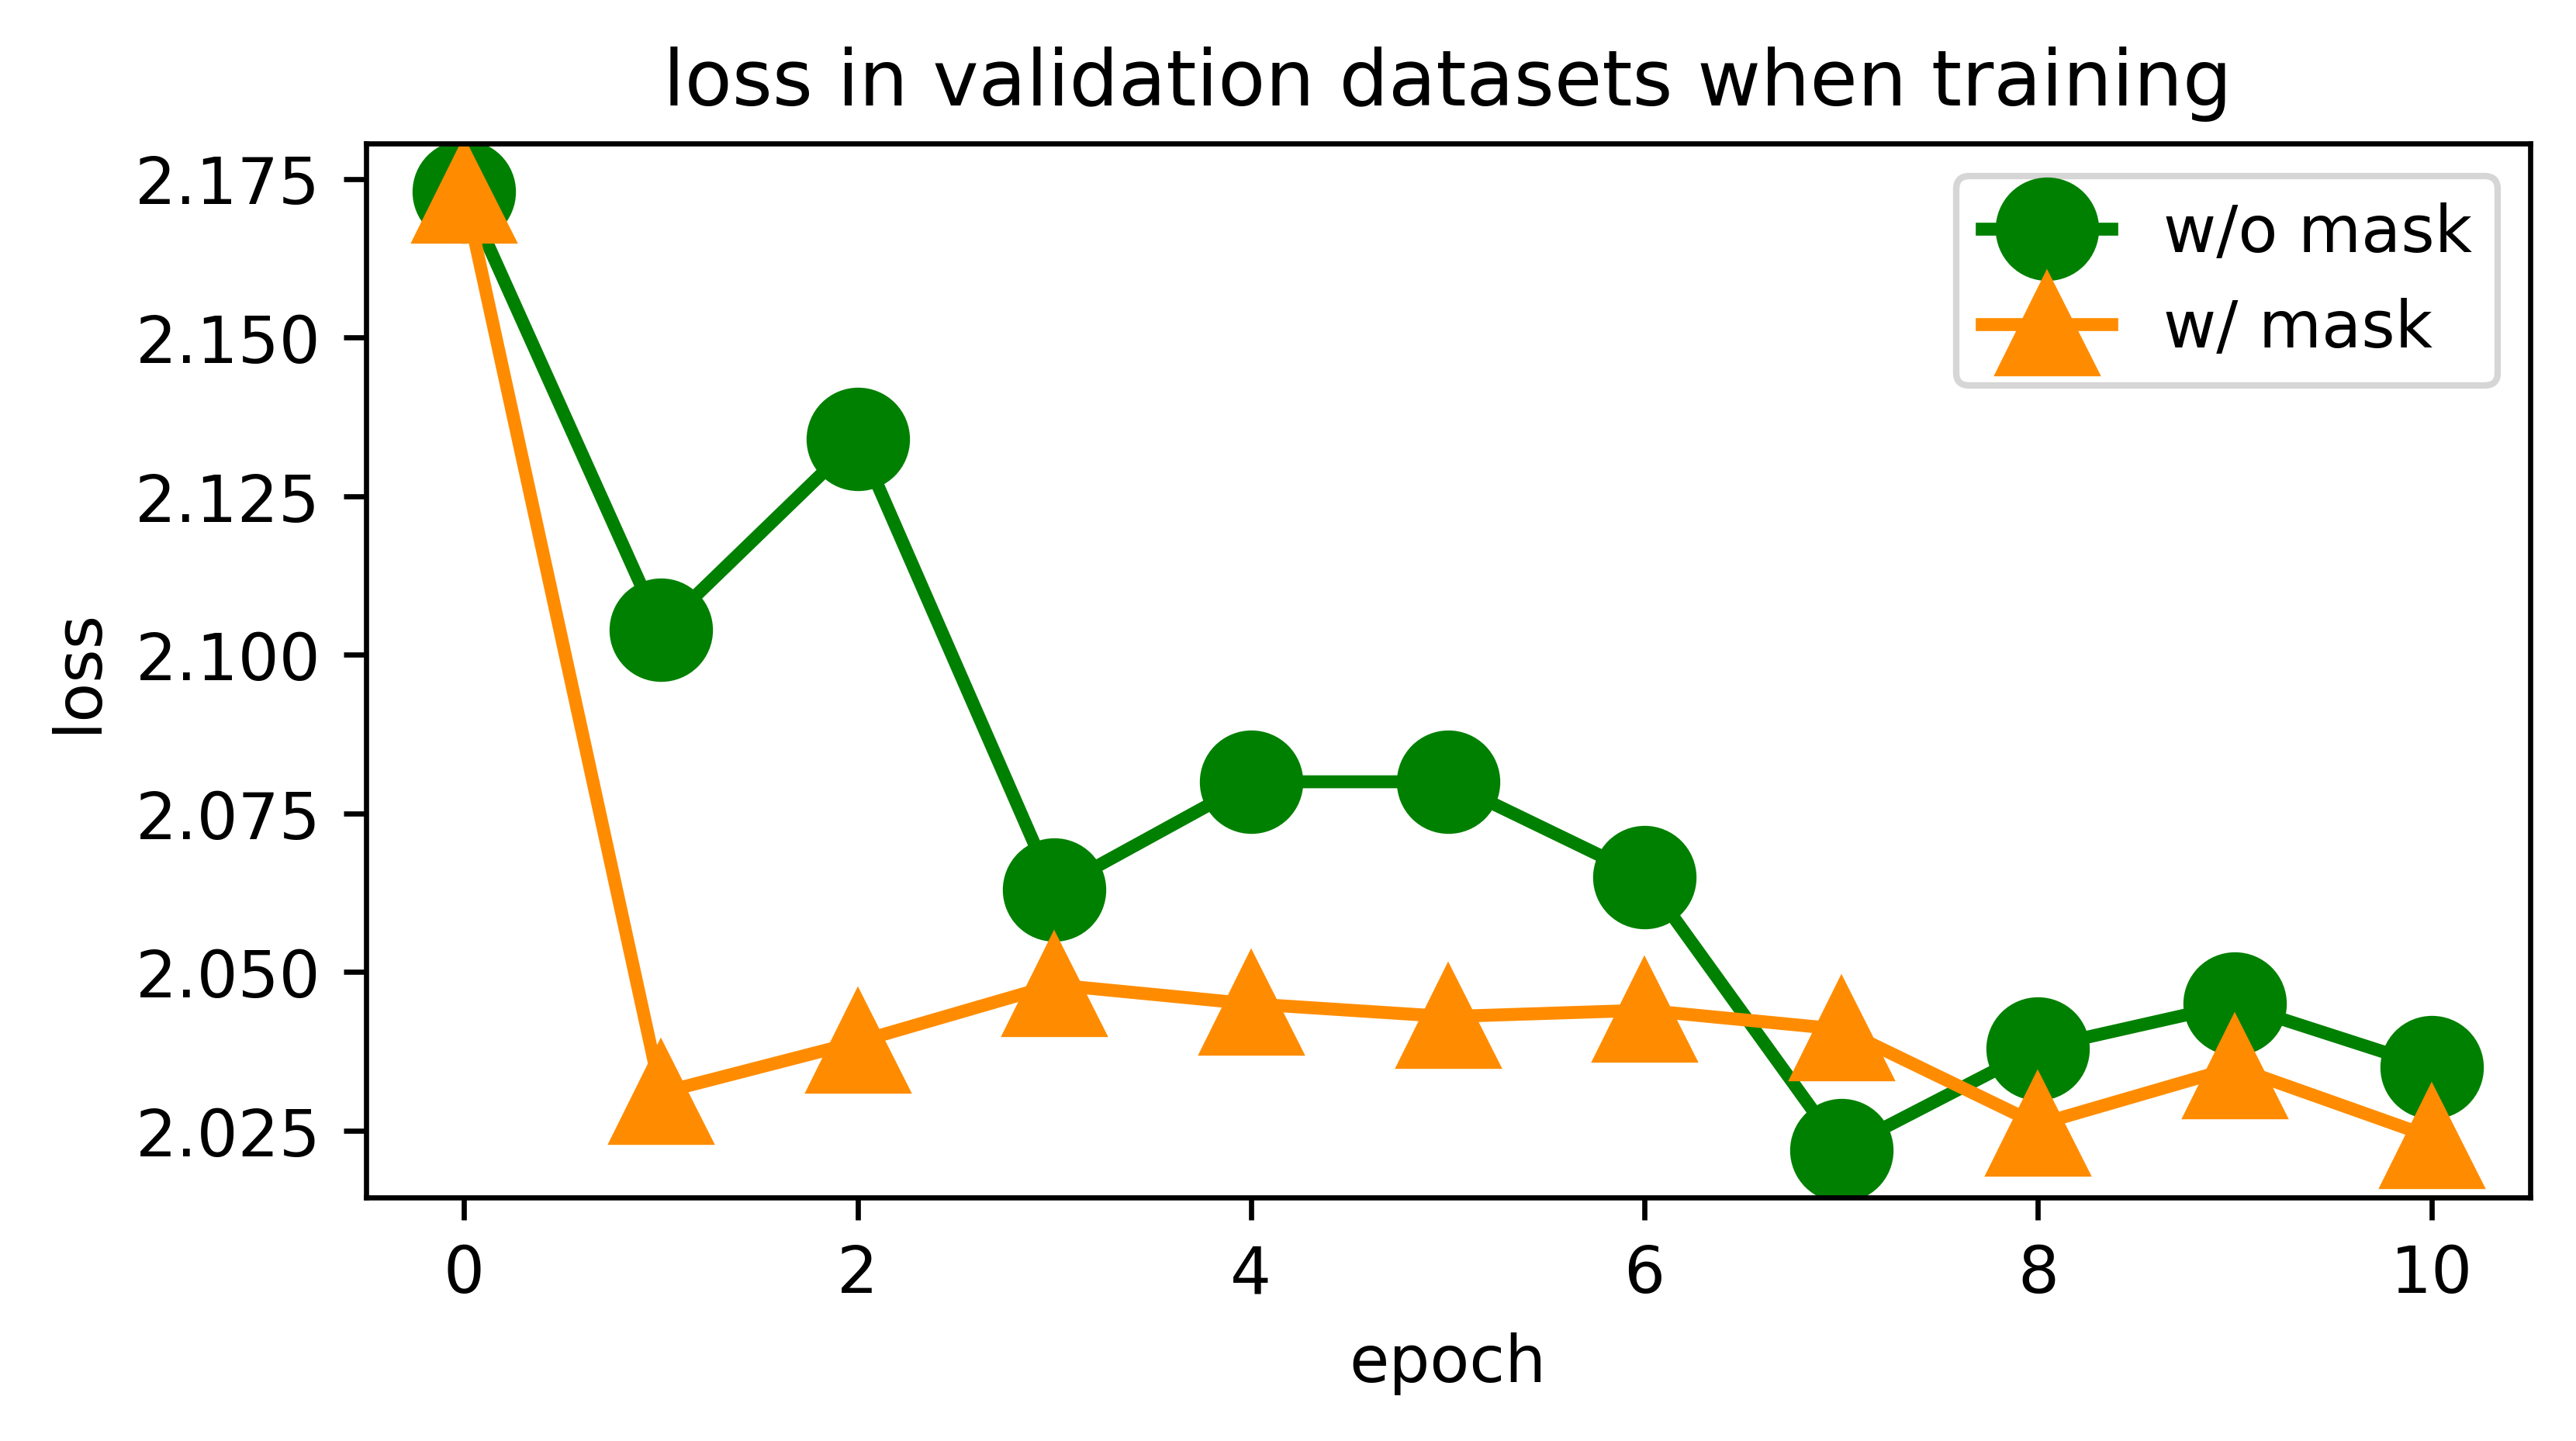

In [8]:
import matplotlib.pyplot as plt
n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datas = {
    'w/o mask': [2.1730, 2.1040 ,2.1340 ,2.0630 ,2.0800 ,2.0800 ,2.0650 ,2.0220 ,2.0380 ,2.0450 ,2.0350],
    'w/ mask': [2.1730 ,2.0310 ,2.0390 ,2.0480 ,2.0450 ,2.0430 ,2.0440 ,2.0410 ,2.0260 ,2.0350 ,2.0240],
}
colors = ['g', 'darkorange']
makers = ['o', '^']
fig = plt.figure(figsize=(6,3), dpi=600)

i = 0
plt.title("loss in validation datasets when training")
plt.ylabel("loss")
plt.xlabel("epoch")
for key in datas.keys():
    data = datas[key]
    c = colors[i]
    m = makers[i]
    i +=1
    plt.plot(n, data, 
            color = c,
            linewidth = 2,
            marker = m,
            markersize = 15,
            label=key
            )
plt.legend()
plt.show()

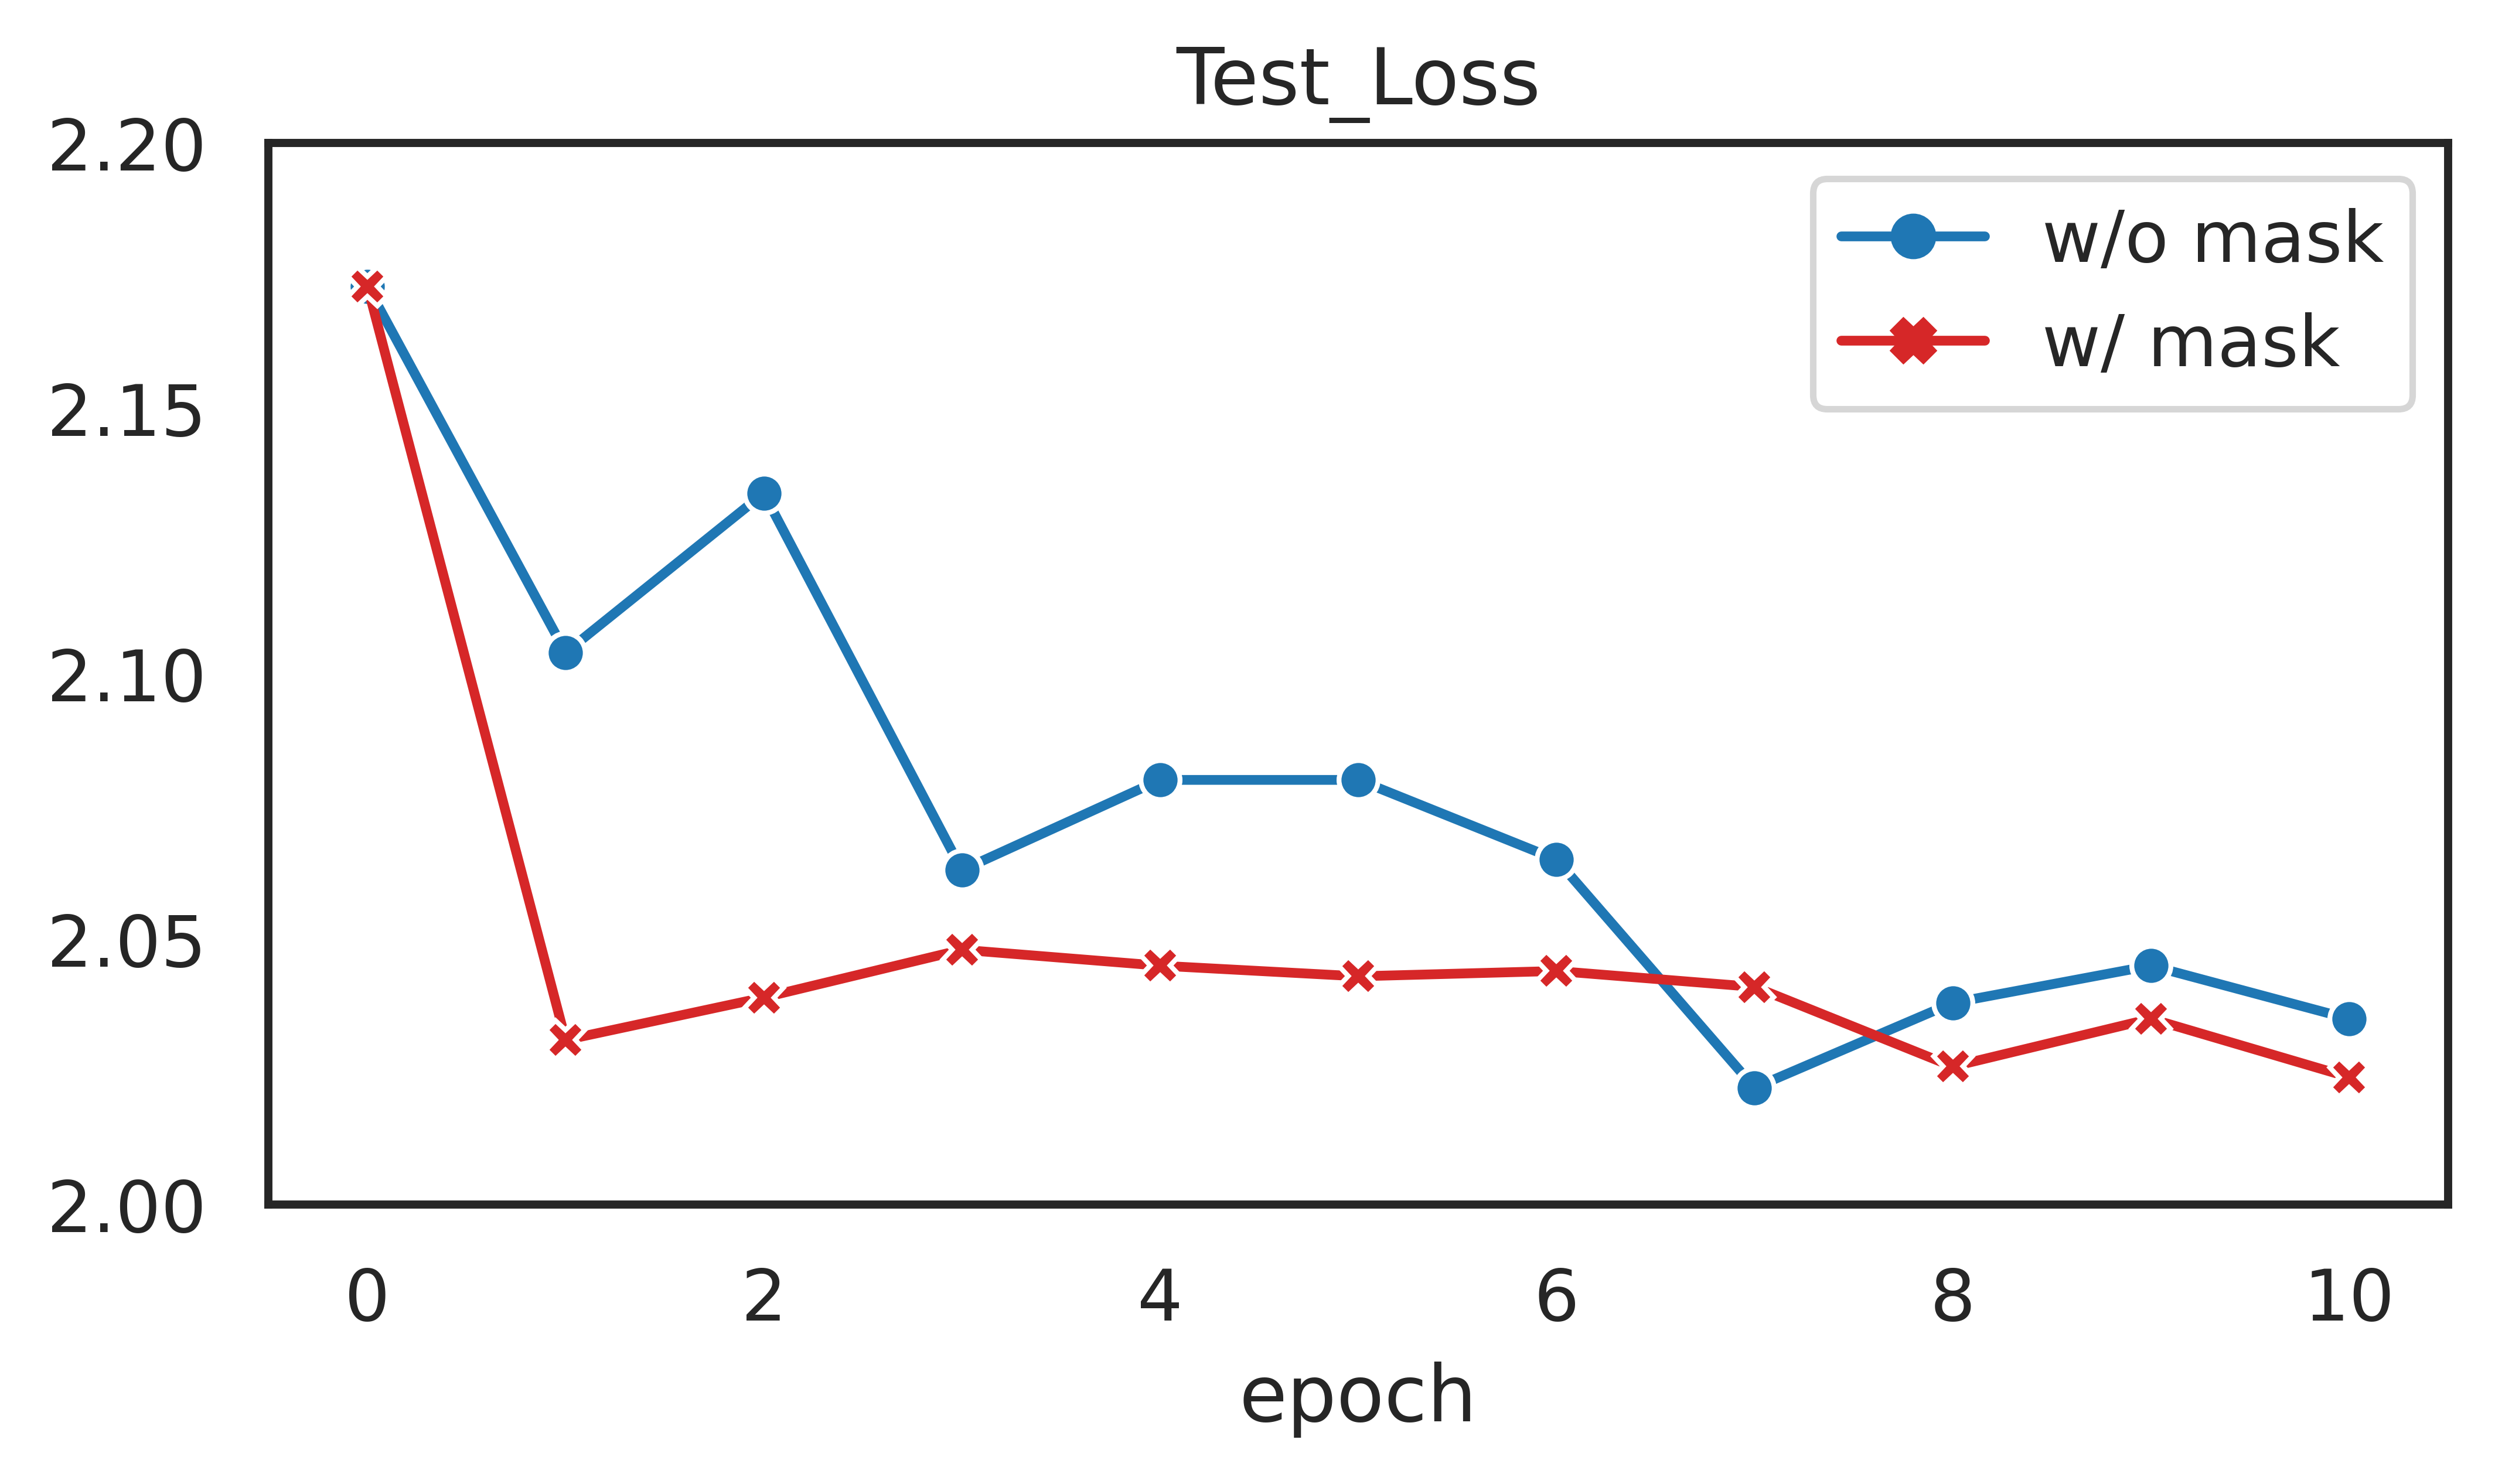

In [17]:
# plot loss in learning process

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib
sns.set_theme(style='white')  # 图形主题
pd.options.display.notebook_repr_html=False  # 表格显示
# plt.rcParams['figure.dpi'] = 75  # 图形分辨率


n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datas = {
    'epoch': n,
    'w/o mask': [2.1730, 2.1040 ,2.1340 ,2.0630 ,2.0800 ,2.0800 ,2.0650 ,2.0220 ,2.0380 ,2.0450 ,2.0350],
    'w/ mask': [2.1730 ,2.0310 ,2.0390 ,2.0480 ,2.0450 ,2.0430 ,2.0440 ,2.0410 ,2.0260 ,2.0350 ,2.0240],
}

sns_data = pd.DataFrame(datas)
plot_data = [sns_data['w/o mask'], sns_data['w/ mask']]

fig = plt.figure(figsize=(6,3), dpi=800)
plt.title("Test_Loss")
# plt.ylabel("loss")
plt.xlabel("epoch")
plt.ylim((2.0, 2.2))
# palette = [ '#69a6d0', "#f58068"]
palette = ['tab:blue', 'tab:red']
sns.lineplot(markers=True, dashes=False,data=plot_data, palette=palette)
plt.show()


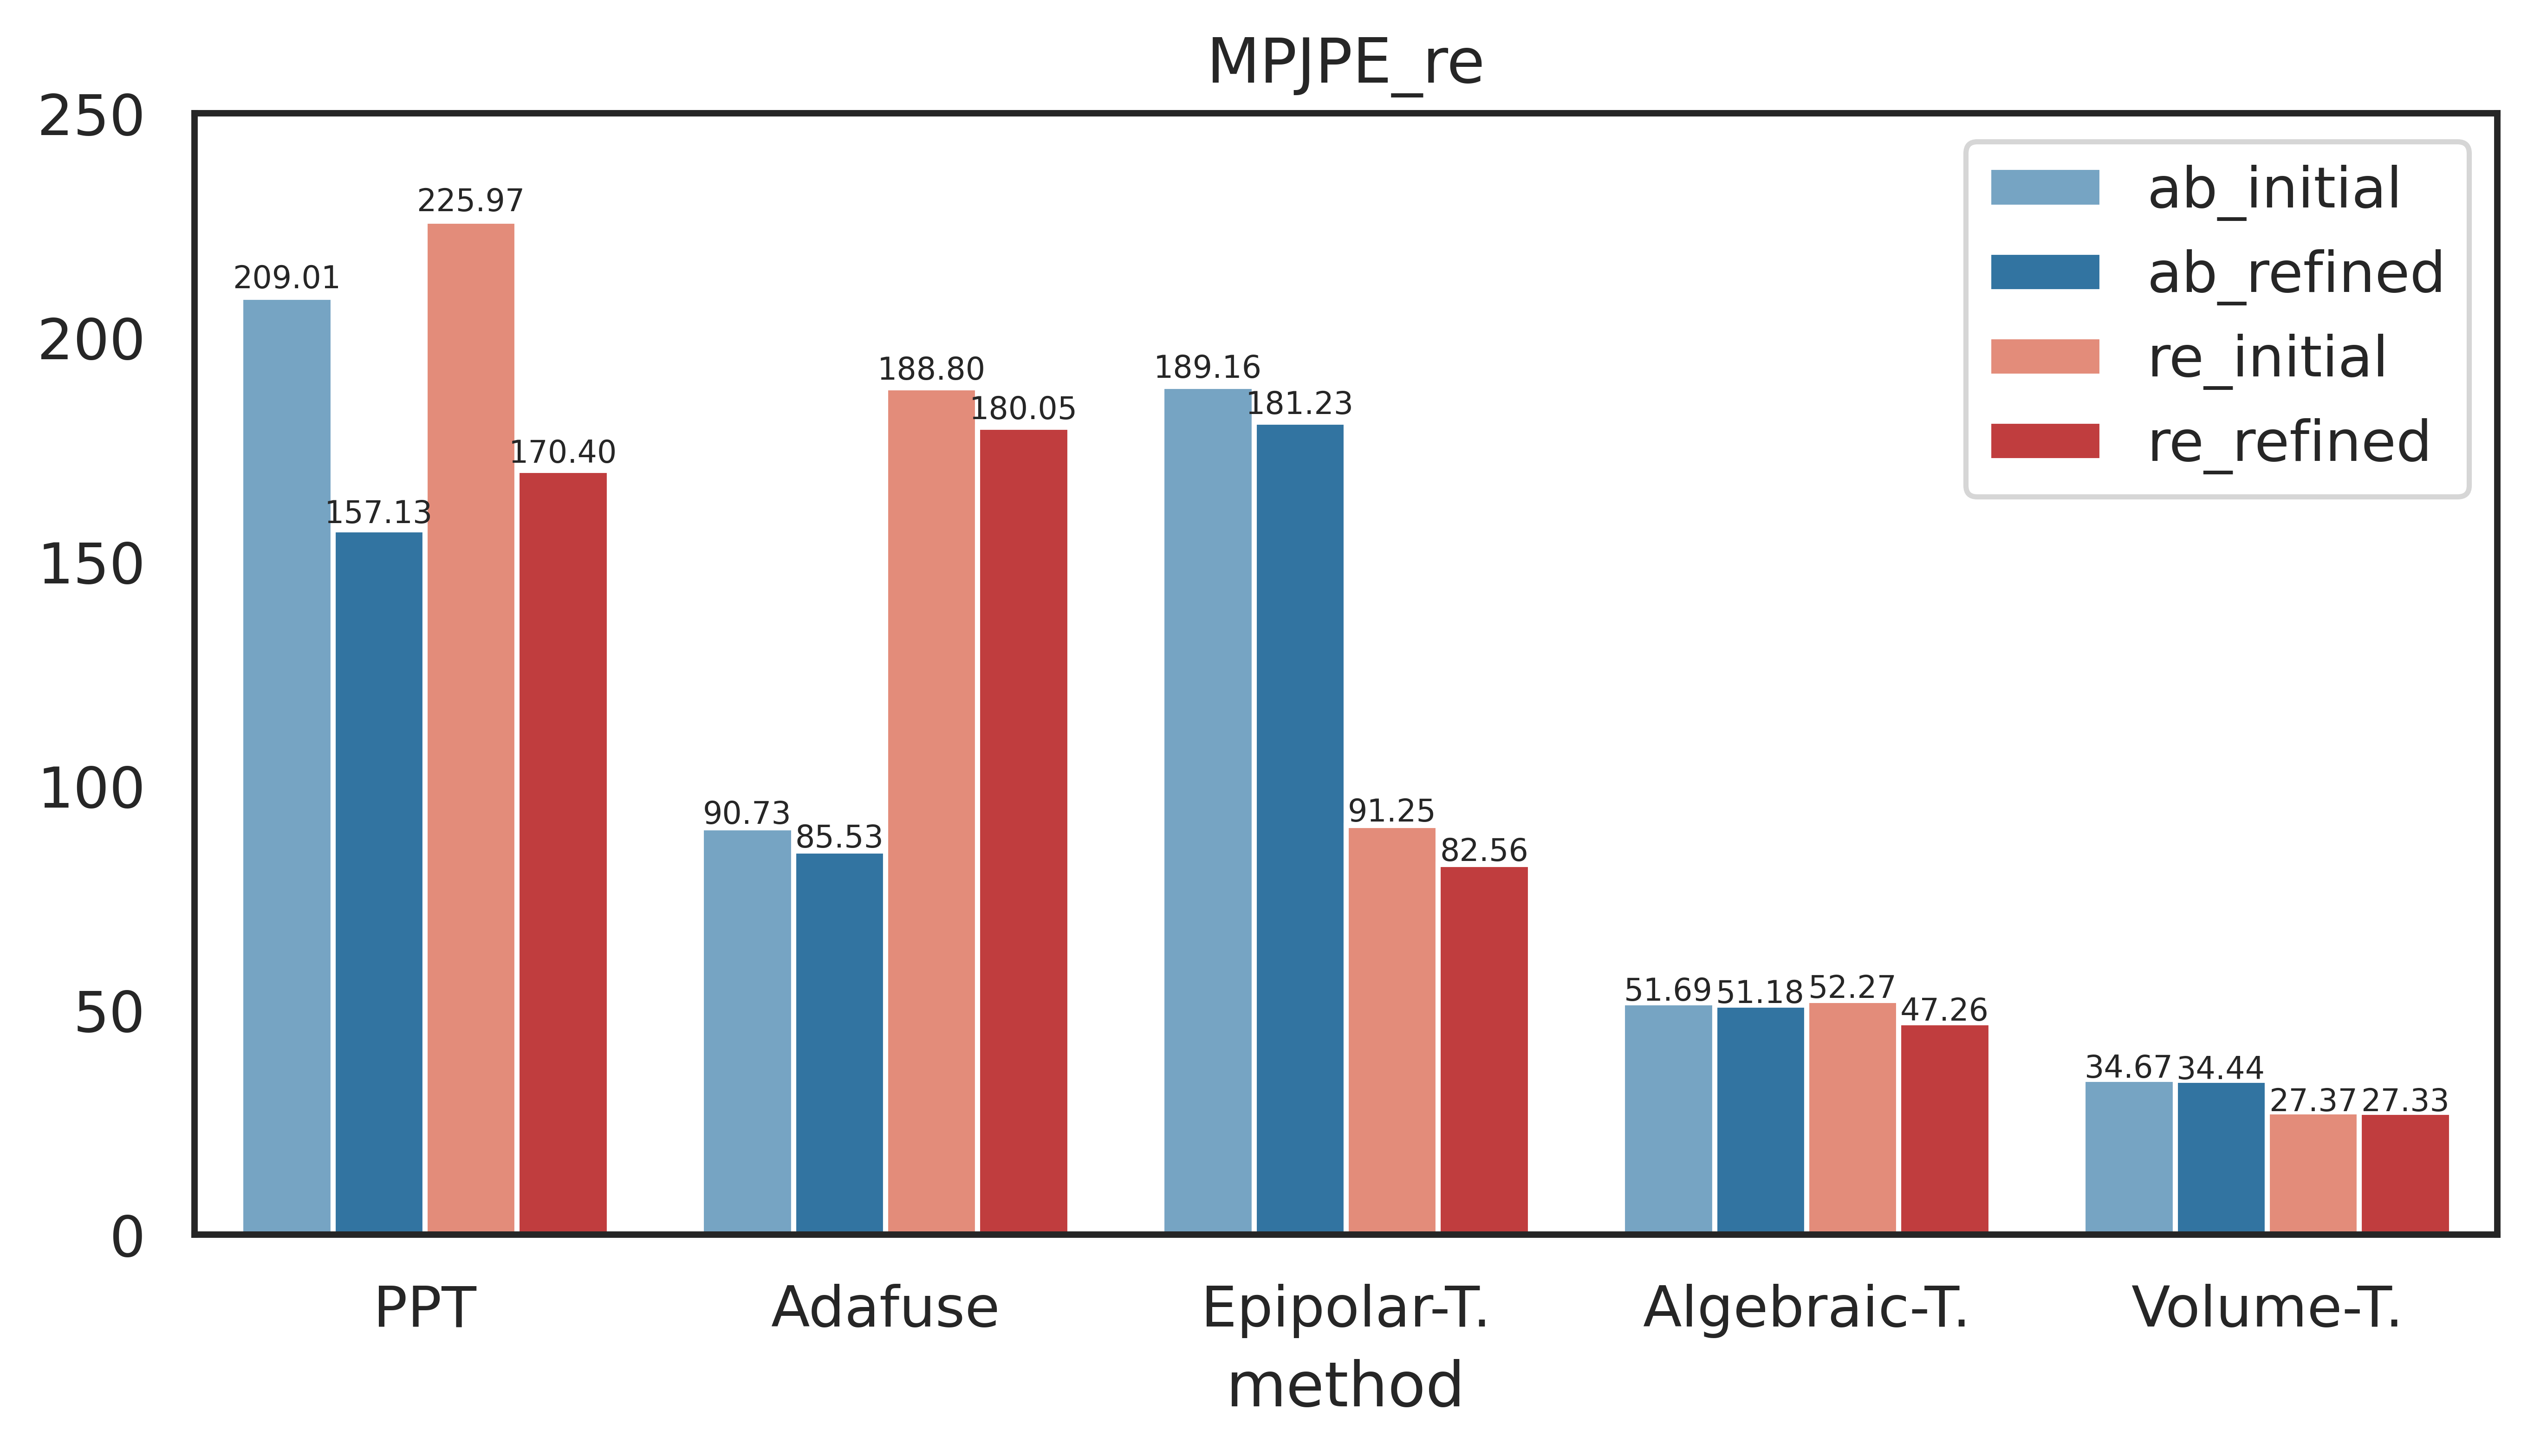

In [5]:
# plot mpjpe after refine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
import matplotlib
pd.options.display.notebook_repr_html=False  # 表格显示
# plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='white')  # 图形主题

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=6) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


datas = {
    'method': ["PPT",  "Adafuse", "Epipolar-T.","Algebraic-T.", "Volume-T.", 
               "PPT",  "Adafuse", "Epipolar-T.","Algebraic-T.", "Volume-T.",
               "PPT",  "Adafuse", "Epipolar-T.","Algebraic-T.", "Volume-T.", 
               "PPT",  "Adafuse", "Epipolar-T.","Algebraic-T.", "Volume-T."],
    'MPJPE': [209.01 ,90.73 ,189.16 ,51.69 ,34.67,
              157.13,85.53,181.23,51.18,34.44,
               225.97,188.80,91.25,52.27,27.37,
                 170.40 ,180.05 ,82.56 ,47.26 ,27.33],
    "": ["ab_initial", "ab_initial", "ab_initial", "ab_initial", "ab_initial",
             "ab_refined","ab_refined","ab_refined","ab_refined","ab_refined",
             "re_initial","re_initial","re_initial","re_initial","re_initial",
             "re_refined","re_refined","re_refined","re_refined","re_refined"]
}
sns_data = pd.DataFrame(datas)
# print(sns.color_palette("Reds_d").as_hex())
fig = plt.figure(figsize=(8,4), dpi=800)
plt.title("MPJPE_re")
# plt.ylabel("MPJPE_re")
plt.xlabel("method")
# palette = [ '#69a6d0',"tab:blue", "#f7a05e","tab:orange"]
palette = [ '#69a6d0',"tab:blue", "#f58068","tab:red"]
p = sns.barplot(x="method", y='MPJPE', hue='', hue_order=["ab_initial", "ab_refined", "re_initial", "re_refined"], 
                palette=palette, data=sns_data)
show_values(p)
plt.ylabel("")
plt.ylim((0, 250))
# color=[(76,114,176), (221,132,82), (161,201,244), (255,180,130)],
# p1 = sns.barplot(x='method', y='MPJPE_re', color='blue', hue='type', data=sns_data)
# show_values(p1)
# p2 = sns.barplot(x='method', y='MPJPE_re_occ', color='red', hue='type', data=sns_data)
# show_values(p2)
plt.show()


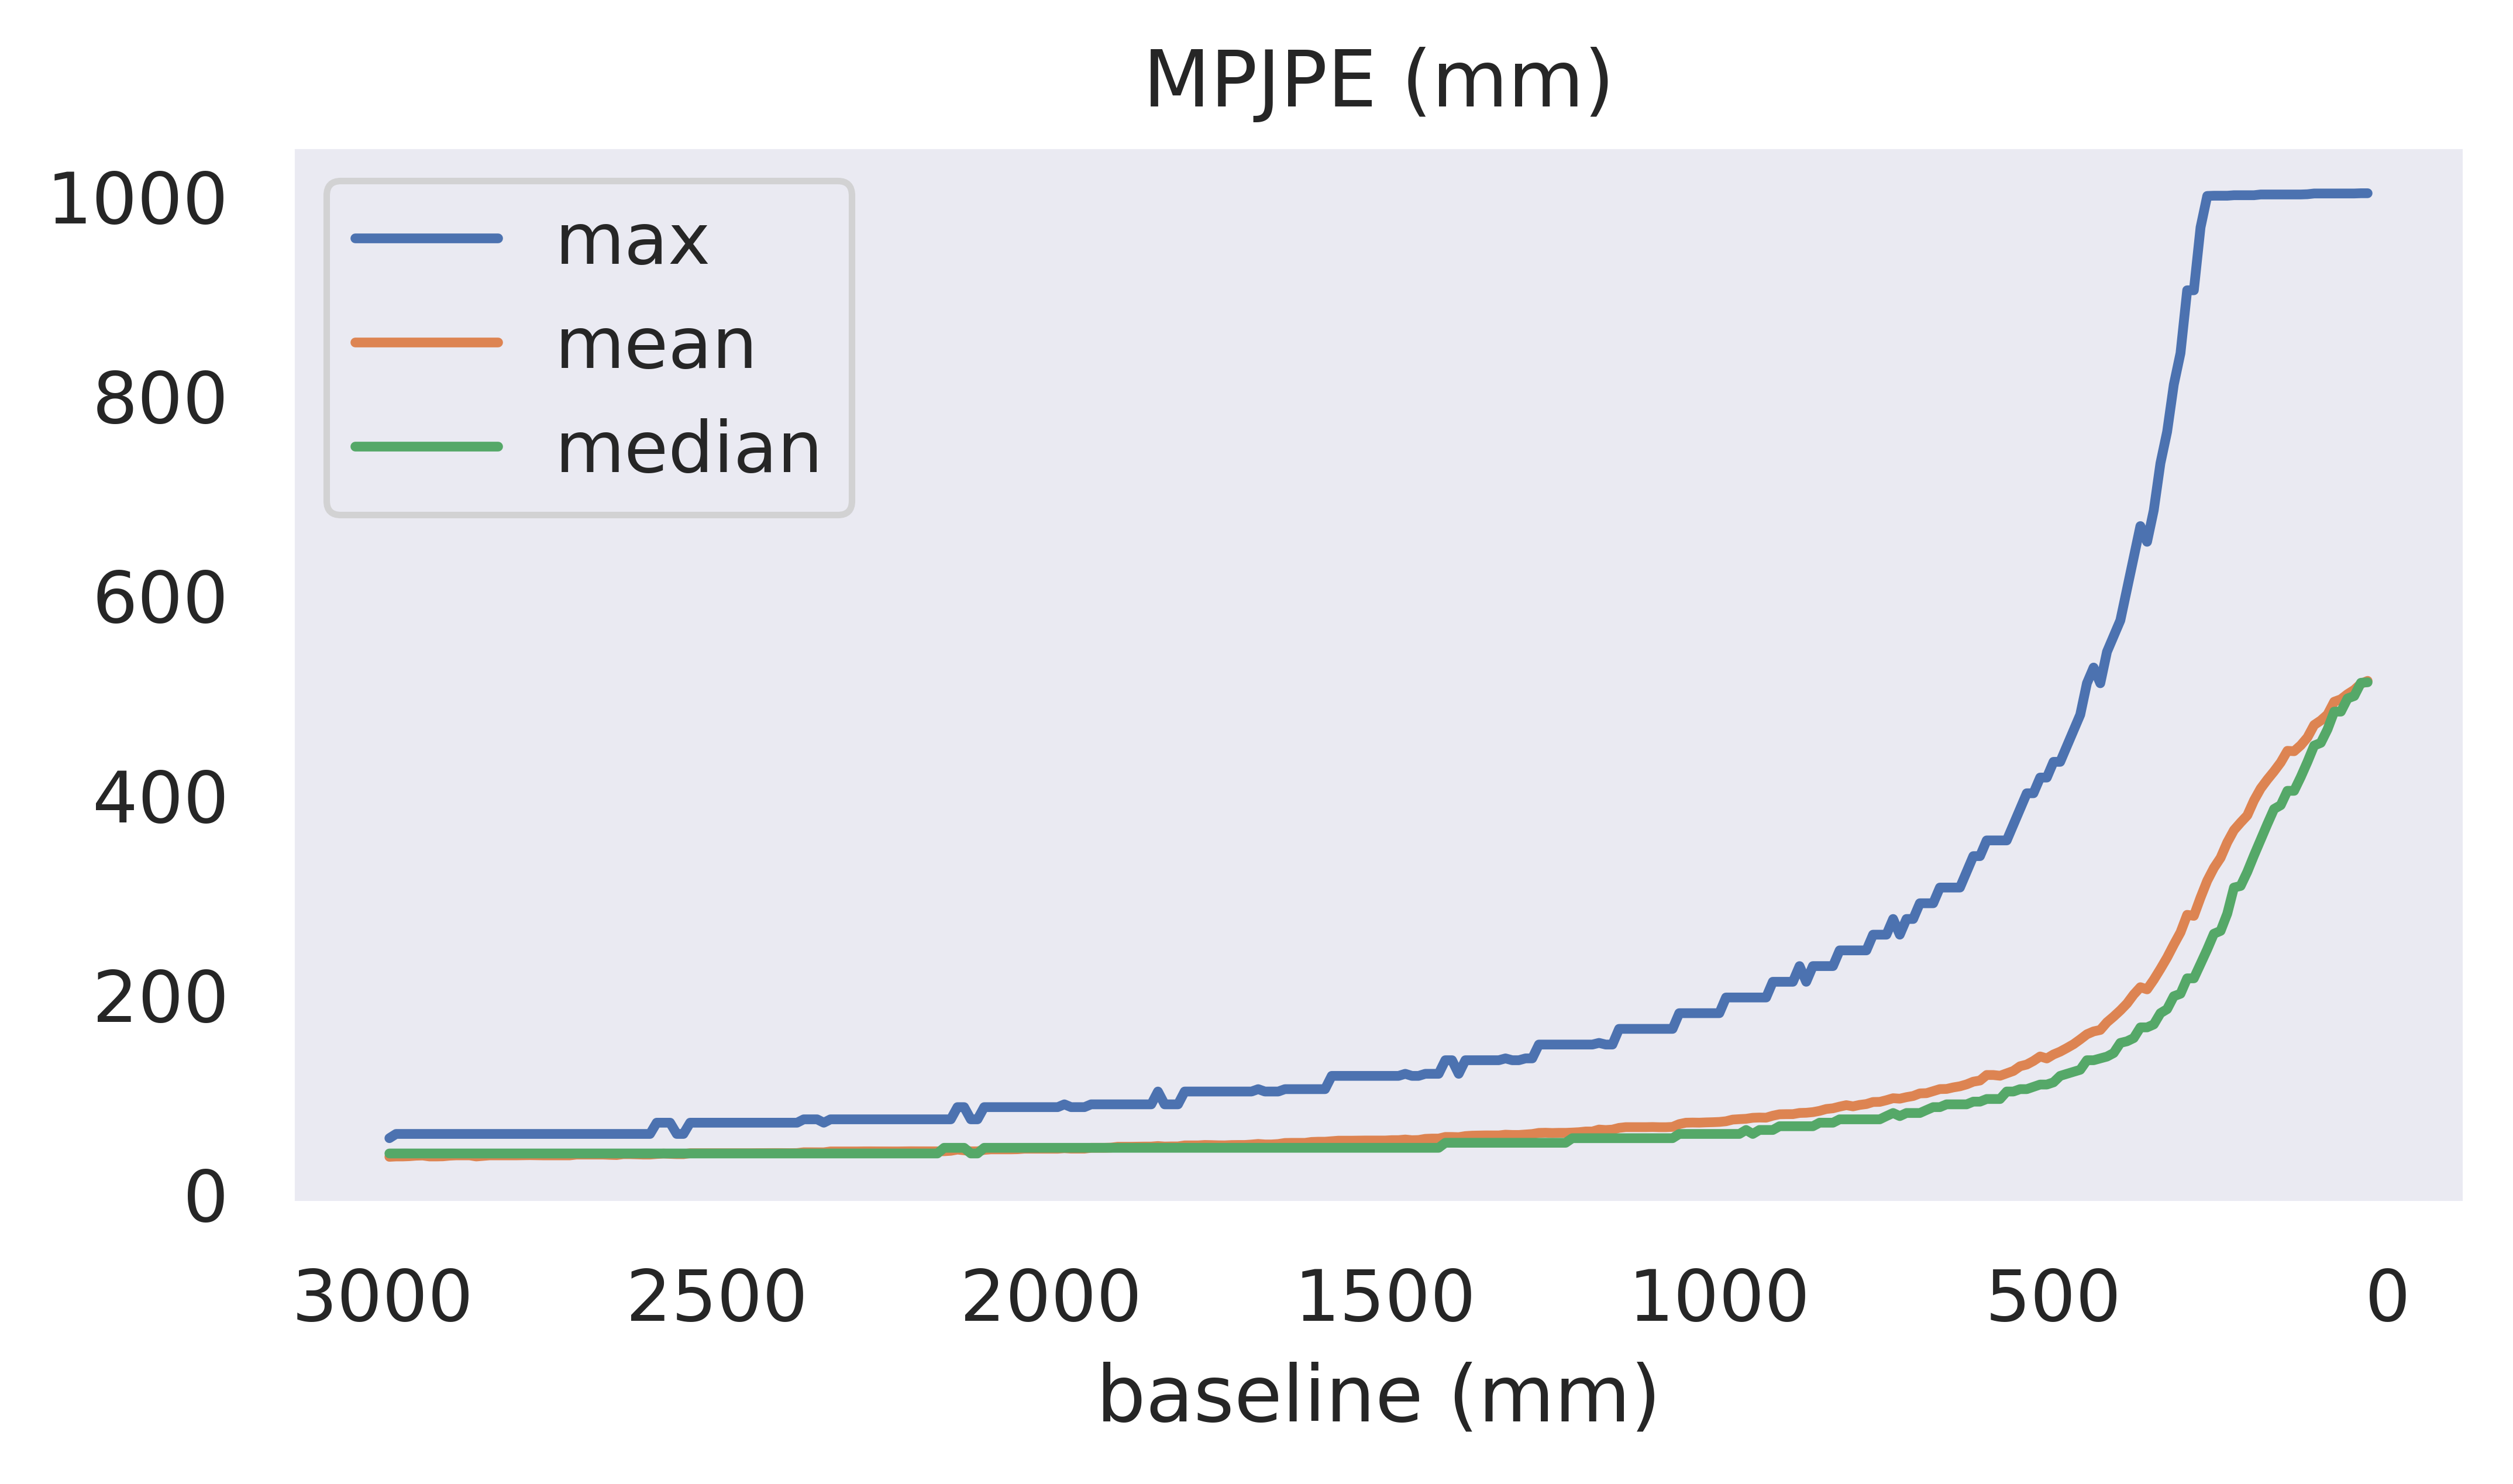

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib
sns.set_theme(style='dark')  # 图形主题
pd.options.display.notebook_repr_html=False  # 表格显示

max_mpjpe = np.array([1002.7861328125, 1002.7861328125, 1002.5387573242188, 1002.5387573242188, 1002.5387573242188, 1002.5387573242188, 1002.5387573242188, 1002.5387573242188, 1002.5387573242188, 1001.79638671875, 1001.548828125, 1001.548828125, 1001.548828125, 1001.548828125, 1001.548828125, 1001.548828125, 1001.548828125, 1000.8056640625, 1000.8056640625, 1000.8056640625, 1000.8056640625, 1000.3099365234375, 1000.3099365234375, 1000.3099365234375, 1000.06201171875, 968.5679321289062, 905.5802001953125, 905.5802001953125, 842.5931396484375, 811.1001586914062, 763.8607177734375, 732.3681030273438, 685.1300659179688, 653.6383056640625, 669.3841552734375, 637.8926391601562, 606.4015502929688, 574.9110717773438, 559.1660766601562, 543.4212036132812, 511.9321594238281, 527.6765747070312, 511.9321594238281, 480.4440002441406, 464.7003479003906, 448.95697021484375, 433.21392822265625, 433.21392822265625, 417.4712829589844, 417.4712829589844, 401.72906494140625, 401.72906494140625, 385.9873352050781, 370.2461242675781, 354.5054931640625, 354.5054931640625, 354.5054931640625, 354.5054931640625, 338.7655944824219, 338.7655944824219, 323.0267028808594, 307.28851318359375, 307.28851318359375, 307.28851318359375, 307.28851318359375, 291.5513610839844, 291.5513610839844, 291.5513610839844, 275.8154602050781, 275.8154602050781, 260.0810241699219, 275.8154602050781, 260.0810241699219, 260.0810241699219, 260.0810241699219, 244.34835815429688, 244.34835815429688, 244.34835815429688, 244.34835815429688, 244.34835815429688, 228.61778259277344, 228.61778259277344, 228.61778259277344, 228.61778259277344, 212.8898162841797, 228.61778259277344, 212.8898162841797, 212.8898162841797, 212.8898162841797, 212.8898162841797, 197.16505432128906, 197.16505432128906, 197.16505432128906, 197.16505432128906, 197.16505432128906, 197.16505432128906, 197.16505432128906, 181.44456481933594, 181.44456481933594, 181.44456481933594, 181.44456481933594, 181.44456481933594, 181.44456481933594, 181.44456481933594, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 165.72901916503906, 150.02029418945312, 150.02029418945312, 151.66439819335938, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 150.02029418945312, 136.1545867919922, 136.1545867919922, 134.32077026367188, 134.32077026367188, 136.1545867919922, 134.32077026367188, 134.32077026367188, 134.32077026367188, 134.32077026367188, 134.32077026367188, 134.32077026367188, 120.70648956298828, 134.32077026367188, 134.32077026367188, 120.70648956298828, 120.70648956298828, 120.70648956298828, 118.63412475585938, 118.63412475585938, 120.70648956298828, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 118.63412475585938, 105.34725189208984, 105.34725189208984, 105.34725189208984, 105.34725189208984, 105.34725189208984, 105.34725189208984, 105.34725189208984, 102.9662094116211, 102.9662094116211, 102.9662094116211, 105.34725189208984, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 102.9662094116211, 90.122314453125, 90.122314453125, 90.122314453125, 102.9662094116211, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 90.122314453125, 87.3271484375, 87.3271484375, 87.3271484375, 90.122314453125, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 87.3271484375, 75.11339569091797, 75.11339569091797, 87.3271484375, 87.3271484375, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 71.73577117919922, 75.11339569091797, 75.11339569091797, 75.11339569091797, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 71.73577117919922, 60.48152160644531, 60.48152160644531, 71.73577117919922, 71.73577117919922, 71.73577117919922, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 56.231773376464844])
mean_mpjpe = np.array([514.3104248046875, 511.4171447753906, 505.2841491699219, 501.03924560546875, 495.8504333496094, 493.41448974609375, 480.589111328125, 474.64593505859375, 470.125732421875, 457.69464111328125, 449.8199462890625, 443.8572692871094, 444.2301940917969, 432.65960693359375, 423.69940185546875, 415.4915771484375, 406.51123046875, 394.5796813964844, 379.60638427734375, 372.4507751464844, 364.7967834472656, 352.53466796875, 337.1091003417969, 327.00872802734375, 314.08807373046875, 297.2250671386719, 278.9471130371094, 279.9801330566406, 262.3776550292969, 250.12738037109375, 237.2072296142578, 225.77793884277344, 214.95616149902344, 205.29376220703125, 207.47238159179688, 200.1119384765625, 191.13226318359375, 184.21107482910156, 178.03350830078125, 172.3428192138672, 164.62425231933594, 163.18418884277344, 160.305419921875, 155.19326782226562, 150.3697509765625, 146.5350799560547, 142.9168243408203, 140.09942626953125, 136.08424377441406, 138.08416748046875, 133.5891876220703, 129.99380493164062, 128.27809143066406, 123.5820541381836, 121.18082427978516, 118.76184844970703, 119.49343872070312, 119.51653289794922, 113.99872589111328, 112.8327865600586, 110.1291732788086, 108.19780731201172, 107.0843505859375, 105.54866027832031, 105.40267181396484, 103.34949493408203, 101.3116683959961, 101.07769775390625, 98.47821807861328, 97.330322265625, 95.79497528076172, 96.25547790527344, 94.2860107421875, 92.6010971069336, 92.477783203125, 90.4161376953125, 89.54698944091797, 88.11971282958984, 89.2919692993164, 87.85359191894531, 86.16911315917969, 85.46180725097656, 83.59820556640625, 82.3348617553711, 81.69043731689453, 81.49931335449219, 80.31761932373047, 80.2990493774414, 80.16484832763672, 78.74796295166016, 76.7664566040039, 76.90947723388672, 76.64801788330078, 75.64156341552734, 75.28782653808594, 74.85291290283203, 73.1952896118164, 72.49791717529297, 72.22997283935547, 72.0472640991211, 71.76705932617188, 71.86626434326172, 71.72667694091797, 70.33101654052734, 67.53300476074219, 67.2142562866211, 67.2142562866211, 67.4019775390625, 67.26721954345703, 67.26721954345703, 67.26721954345703, 67.28453063964844, 66.54326629638672, 64.8222885131836, 64.38688659667969, 64.87570190429688, 62.93098068237305, 62.93098068237305, 62.2202262878418, 61.86509704589844, 61.58961868286133, 61.59677505493164, 61.4178581237793, 61.67994689941406, 61.52621078491211, 60.41267395019531, 59.94279479980469, 59.45260238647461, 59.474361419677734, 59.74449920654297, 58.99224090576172, 59.016845703125, 59.02202606201172, 58.88436508178711, 58.758216857910156, 58.31956100463867, 57.241519927978516, 57.44158935546875, 57.45888137817383, 55.84821319580078, 55.84821319580078, 55.55473709106445, 54.38451385498047, 54.212100982666016, 54.89402389526367, 54.261451721191406, 54.261451721191406, 53.8880500793457, 53.8880500793457, 53.905662536621094, 53.905662536621094, 53.81404113769531, 53.72169494628906, 53.72169494628906, 53.72169494628906, 53.2191047668457, 52.69156265258789, 52.69156265258789, 52.45775604248047, 51.551231384277344, 51.551231384277344, 51.551231384277344, 51.42717742919922, 50.38606262207031, 49.95972442626953, 49.95972442626953, 50.466217041015625, 49.874855041503906, 49.428157806396484, 49.428157806396484, 49.36138916015625, 49.027809143066406, 49.09036636352539, 49.30245590209961, 49.428157806396484, 49.004329681396484, 49.004329681396484, 49.004329681396484, 47.98069381713867, 47.98069381713867, 47.84446716308594, 48.36594772338867, 47.82738494873047, 47.82738494873047, 47.713592529296875, 47.634647369384766, 47.634647369384766, 47.634647369384766, 46.79983901977539, 46.604881286621094, 46.57961654663086, 46.604881286621094, 45.734100341796875, 45.734100341796875, 45.734100341796875, 46.169490814208984, 45.65577697753906, 45.65577697753906, 45.65577697753906, 45.65577697753906, 45.68642807006836, 45.695533752441406, 45.18135070800781, 45.035614013671875, 45.035614013671875, 45.035614013671875, 45.035614013671875, 44.49929428100586, 43.04167556762695, 43.04167556762695, 44.08822250366211, 44.78927993774414, 43.59722900390625, 43.170257568359375, 43.04167556762695, 43.04167556762695, 43.04167556762695, 43.0823860168457, 43.122169494628906, 43.02434158325195, 42.94059753417969, 42.94059753417969, 42.94059753417969, 42.991432189941406, 43.04167556762695, 43.02434158325195, 42.94059753417969, 42.94059753417969, 42.94059753417969, 42.94059753417969, 42.94059753417969, 42.04988479614258, 42.0910758972168, 42.13226318359375, 42.13226318359375, 41.3077392578125, 41.2427978515625, 41.3077392578125, 41.3077392578125, 41.3077392578125, 41.3077392578125, 41.2427978515625, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 41.17703628540039, 40.23527526855469, 40.23527526855469, 40.51243591308594, 40.7859992980957, 40.37876892089844, 39.80293655395508, 39.80293655395508, 40.02198791503906, 40.23527526855469, 40.23527526855469, 39.314083099365234, 39.51966857910156, 39.80293655395508, 39.80293655395508, 39.80293655395508, 39.80293655395508, 39.80293655395508, 39.018394470214844, 39.018394470214844, 39.018394470214844, 39.018394470214844, 39.018394470214844, 39.12493896484375, 39.22853088378906, 39.12493896484375, 39.018394470214844, 39.018394470214844, 39.018394470214844, 39.018394470214844, 39.018394470214844, 38.44961929321289, 37.92578125, 39.018394470214844, 39.018394470214844, 39.018394470214844, 38.707332611083984, 38.05695724487305, 37.92578125, 37.92578125, 38.86397933959961, 38.707332611083984, 38.18421173095703, 37.92578125, 37.92578125, 37.57334899902344])
median_mpjpe=np.array([512.900146484375, 512.4163818359375, 499.17779541015625, 496.6875, 483.5312194824219, 483.5312194824219, 465.7664794921875, 452.2591857910156, 449.509033203125, 433.21392822265625, 418.0649108886719, 404.19085693359375, 404.19085693359375, 389.8233337402344, 385.9873352050781, 370.91534423828125, 355.2044982910156, 339.4969787597656, 323.0267028808594, 308.8984069824219, 307.28851318359375, 281.15863037109375, 263.8676452636719, 261.0328369140625, 245.3612060546875, 230.7771759033203, 216.35635375976562, 216.35635375976562, 200.9031219482422, 198.4188995361328, 185.4994659423828, 181.44456481933594, 170.15882873535156, 167.218505859375, 167.218505859375, 156.4931182861328, 153.29075622558594, 151.66427612304688, 141.51351928710938, 137.9640350341797, 136.15447998046875, 134.32077026367188, 134.32066345214844, 124.74797058105469, 122.74375915527344, 120.70637512207031, 118.63412475585938, 112.18756103515625, 109.95472717285156, 109.95472717285156, 107.67564392089844, 105.34725189208984, 105.34725189208984, 102.9662094116211, 102.96609497070312, 95.46746063232422, 95.46746063232422, 95.46746063232422, 92.83336639404297, 92.83336639404297, 90.122314453125, 90.12220001220703, 90.12220001220703, 90.12220001220703, 87.3271484375, 87.32701873779297, 84.43946838378906, 81.44953155517578, 81.44953155517578, 81.44950866699219, 78.34554290771484, 81.44950103759766, 78.34554290771484, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 75.11339569091797, 71.73577117919922, 71.73577117919922, 71.73573303222656, 68.19104766845703, 68.19104766845703, 68.19104766845703, 68.19100952148438, 68.19100952148438, 68.19100952148438, 64.45166015625, 64.45166015625, 64.45166015625, 60.48152160644531, 64.45166015625, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.48152160644531, 60.481483459472656, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.231773376464844, 56.23173141479492, 56.23173141479492, 56.23173141479492, 56.23173141479492, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.6334228515625, 51.63338088989258, 51.6334228515625, 51.63338088989258, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.583351135253906, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 40.91462707519531, 40.91462707519531, 46.58330154418945, 46.58330154418945, 46.58330154418945, 46.58330154418945, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531, 40.91462707519531])

baseline = list(range(30,3000,10))
mpjpes = np.hstack((max_mpjpe, mean_mpjpe))
mpjpes = np.hstack((mpjpes, median_mpjpe))
datas = {
    'baseline': baseline*3,
    '': ['max'] * len(baseline) + ['mean'] * len(baseline) + ['median'] * len(baseline),
    'mpjpe': mpjpes

}

sns_data = pd.DataFrame(datas)
# plot_data = [sns_data['max'], sns_data['mean'], sns_data['median']]

fig = plt.figure(figsize=(6,3), dpi=800)
plt.title("MPJPE (mm)")
# plt.set_ylabel(off)
plt.xlabel("baseline (mm)")
# plt.xticks([3000, 2500, 2000,1500,1000,500,0])
# palette = [ '#69a6d0', "#f58068"]
p = sns.lineplot(x='baseline', y='mpjpe', hue='', data=sns_data, markers=False, dashes=False)
plt.ylabel("")
p.invert_xaxis()
plt.show()
